In [2]:
using Pkg
Pkg.activate("..")
using QTool
using Plots

# Example of using HybridOhmicBath

## Choose Parameters

To construct a HybridOhmic bath, we need to specify four parameters

In [3]:
η=0.25/8/pi
W = 2
fc = 4
T = 10

bath = HybridOhmic(W, η, fc, T)

Hybrid Ohmic bath instance:
W (mK): 2.0
ϵ (GHz): 0.004167322445025047
η (unitless): 0.009947183943243459
ωc (GHz): 4.0
T (mK): 10.0

## Ohmic Part
The Ohmic part of the correlation function is
\begin{equation}
    \Bigg((1+i\omega_c\tau)\frac{\sinh(\pi\tau/\beta)}{\pi\tau/\beta}\Bigg)^{-4\eta}
\end{equation}

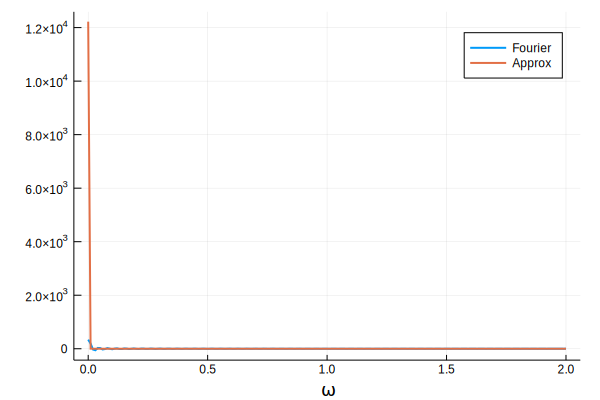

In [39]:
ω_axis = range(0, 2.0, length=200)
yf = [real(fourier_ohmic_cor(ω, 0.001, bath)[1]) for ω in ω_axis]
ya = [approximated_spectrum(ω, 0.001, bath) for ω in ω_axis]
plot(ω_axis, yf, label="Fourier", linewidth=2)
plot!(ω_axis, ya, label="Approx", linewidth=2)
xlabel!("\\omega")

In [42]:
fourier_ohmic_cor(0.0, 0.001, bath)

(340.62696219438243 + 1.8216502321887797e-19im, 8.083999369019247e-5)

In [62]:
ohmic_cor(173, 0.001, bath)

0.0 - 0.0im

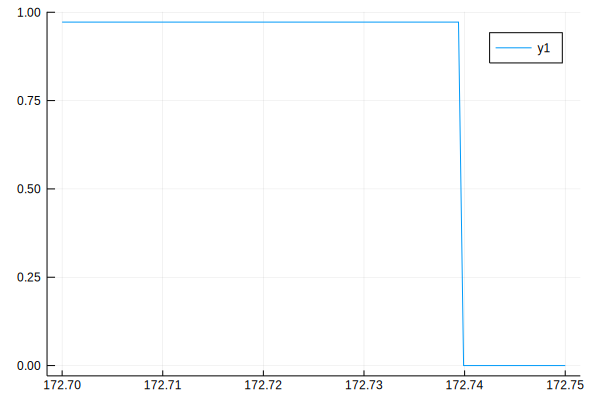

In [69]:
ta = range(172.7, 172.75, length = 100)
y = [real(ohmic_cor(t, 0.001, bath)) for t in ta]
plot(ta, y)

In [74]:
ea = η * 0.001
(1+8.0im*π*173)^(-4*ea)

0.9996667249322408 - 6.247002232111854e-5im

In [84]:
τ = 172.73
x = π * τ / bath.β
sinh(x) 

1.7264946948301847e308